<font color='green' size=18>Pandas - Trabalhando com datas

# Trabalhando com Datas

In [ ]:
# Importando bibliotecas
import pandas as pd

In [ ]:
# Leitura dos arquivos 
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

# Concatenando dataframes
df = pd.concat([df1, df2, df3, df4, df5])

# Visualizando 5 primeiros elementos
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
# criando uma nova coluna
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

## Alterando os tipos

In [ ]:
# Alterando uma coluna de data e um inteiro
df['Data'] = df['Data'].astype('int64')

In [ ]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID       int64
Qtde         int64
Receita    float64
dtype: object

In [ ]:
# Transformando colunas de "Data" em data
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

## Criando agrupamento com Datas

In [ ]:
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

## Criando colunas com tipos data

In [ ]:
# Criando uma nova coluna com ano
df['Ano_venda'] = df['Data'].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda
92,Natal,2019-01-02,4.57,1035,1,4.57,2019
24,Fortaleza,2019-01-01,35.38,1005,4,141.52,2019
18,Recife,2019-01-01,49.40,980,5,247.00,2019
19,Fortaleza,2019-01-01,18.86,1002,3,56.58,2019
78,Salvador,2019-01-01,111.20,1036,3,333.60,2019


In [ ]:
# Extraindo o mês e o dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [ ]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda
0,Salvador,2018-01-01,31.06,1037,3,93.18,2018,1,1
11,Salvador,2019-01-01,30.62,1034,3,91.86,2019,1,1
86,Aracaju,2018-01-01,154.92,1521,5,774.60,2018,1,1
57,Recife,2019-01-01,201.41,980,3,604.23,2019,1,1
126,Salvador,2019-03-02,41.69,1036,2,83.38,2019,3,2
44,Aracaju,2018-01-01,11.42,1520,5,57.10,2018,1,1
149,Natal,2019-01-02,22.38,1034,3,67.14,2019,1,2
165,Salvador,2019-01-02,11.54,1037,1,11.54,2019,1,2
92,Fortaleza,2019-01-01,3.49,1005,4,13.96,2019,1,1
148,Natal,2019-01-02,40.59,1037,3,121.77,2019,1,2


In [ ]:
# Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
# Crindo uma nova coluna que mostra a diferenças de dias
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias
81,Salvador,2019-01-01,17.36,1037,2,34.72,2019,1,1,365 days
101,Recife,2019-01-01,172.55,983,7,1207.85,2019,1,1,365 days
161,Natal,2019-01-02,5.80,1036,1,5.80,2019,1,2,366 days
126,Natal,2019-01-02,41.69,1036,2,83.38,2019,1,2,366 days
27,Natal,2018-07-16,390.00,853,3,1170.00,2018,7,16,196 days


In [ ]:
# Crinado uma coluna de trimestre
df['trimestre_venda'] = df['Data'].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
226,Salvador,2019-01-02,38.32,1035,2,76.64,2019,1,2,366 days,1
78,Aracaju,2018-01-01,154.85,1522,9,1393.65,2018,1,1,0 days,1
68,Recife,2019-01-01,175.45,980,3,526.35,2019,1,1,365 days,1
180,Salvador,2019-01-02,116.63,1035,2,233.26,2019,1,2,366 days,1
32,Natal,2019-03-17,244.00,854,2,488.00,2019,3,17,440 days,1


## Filtrando colunas de Data

In [ ]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [ ]:
vendas_marco_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


# Visualização de dados

In [ ]:
# Fazendo uma contagem de qual loja teve o maior numero de vendas
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

### Criando uma Tabela de Frequência

In [ ]:
# Criando tabela de frequência
tb_frequencia = pd.merge(
    left = df['LojaID'].value_counts(ascending=False, sort=False),
    right = df['LojaID'].value_counts(ascending=False, normalize=True, sort=False),
    left_index = True,
    right_index = True
)

tb_frequencia

,LojaID_x,LojaID_y
1034,67,0.074944
1035,112,0.125280
1036,117,0.130872
1037,101,0.112975
1520,39,0.043624
1521,21,0.023490
1522,41,0.045861
1523,29,0.032438
852,29,0.032438
853,26,0.029083


In [ ]:
# Renomeando colunas da tabela de Frequência
tb_frequencia.rename(columns={
    'LojaID_x' : 'Frequência (Vendas)',
    "LojaID_y" : 'Percentual (Vendas)'
}, inplace = True)

# Renomeando index
tb_frequencia.rename_axis('ID_Loja', inplace=True)

tb_frequencia

,Frequência (Vendas),Percentual (Vendas)
ID_Loja,,
1034,67,0.074944
1035,112,0.125280
1036,117,0.130872
1037,101,0.112975
1520,39,0.043624
1521,21,0.023490
1522,41,0.045861
1523,29,0.032438
852,29,0.032438


In [ ]:
# Formatando valores de uma variável
tb_frequencia.style.format({'Percentual (Vendas)' : '{:.2%}'})

,Frequência (Vendas),Percentual (Vendas)
ID_Loja,,
1034,67,7.49%
1035,112,12.53%
1036,117,13.09%
1037,101,11.30%
1520,39,4.36%
1521,21,2.35%
1522,41,4.59%
1523,29,3.24%
852,29,3.24%


In [ ]:
# Desenhando uma barra de fundo
tb_frequencia.style.format({'Percentual (Vendas)' : '{:.2%}'}).bar(subset= "Percentual (Vendas)", 
                                                                   vmin= 0.01,
                                                                   color= 'lightblue'
                                                                   )

,Frequência (Vendas),Percentual (Vendas)
ID_Loja,,
1034,67,7.49%
1035,112,12.53%
1036,117,13.09%
1037,101,11.30%
1520,39,4.36%
1521,21,2.35%
1522,41,4.59%
1523,29,3.24%
852,29,3.24%


In [ ]:
tb_frequencia.style.format({'Percentual (Vendas)' : '{:.2%}'}).bar(subset= "Percentual (Vendas)", 
                                                                   vmin= 0.01,
                                                                   color= 'lightblue'
                                                                   )\
                                                                   .applymap(lambda x: f"color: {'red' if x >= 50 else 'black'}",
                                                                             subset= 'Frequência (Vendas)')

,Frequência (Vendas),Percentual (Vendas)
ID_Loja,,
1034,67,7.49%
1035,112,12.53%
1036,117,13.09%
1037,101,11.30%
1520,39,4.36%
1521,21,2.35%
1522,41,4.59%
1523,29,3.24%
852,29,3.24%


## Criando Gráficos

### Gráfico de barra

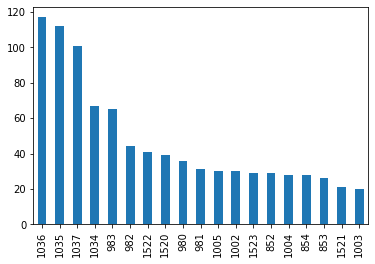

In [ ]:
df['LojaID'].value_counts(ascending=False).plot.bar()

### Gráfico de barra horizontal

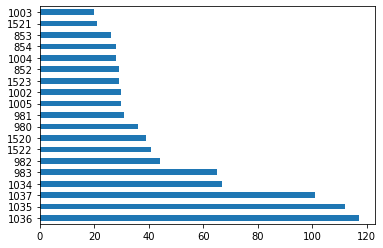

In [ ]:
df['LojaID'].value_counts(ascending=False).plot.barh();

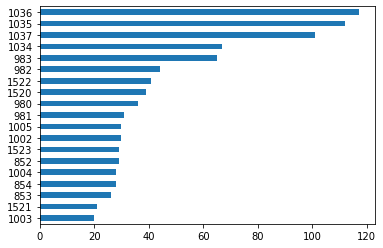

In [ ]:
# Deixando barh do maior para o menor
df['LojaID'].value_counts(ascending=True).plot.barh();

### Gráfico de Pizza

In [ ]:
# Criando uma variável que calcula total de receita por ano
receita_total_ano = df.groupby(df["Data"].dt.year)['Receita'].sum()

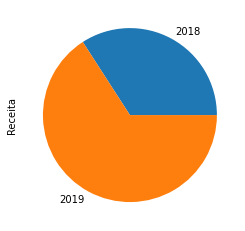

In [ ]:
# Visualização de receita total em uma gráfico de pizza
receita_total_ano.plot.pie();

In [ ]:
# Total de venda por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

## Estilizando Gráficos

### Importando Biblioteca matplotlib

In [ ]:
# Importando matplotlib
import matplotlib.pyplot as plt

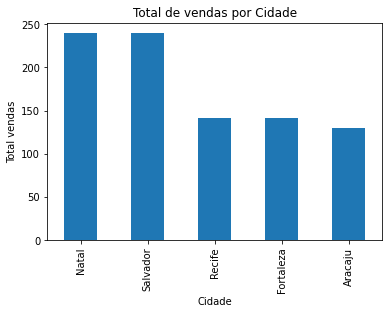

In [ ]:
df['Cidade'].value_counts().plot.bar(title= 'Total de vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total vendas')
plt.show()

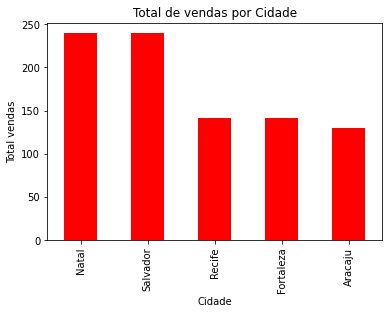

In [ ]:
# Alterando a cor da barra do gráfico
df['Cidade'].value_counts().plot.bar(title= 'Total de vendas por Cidade',
                                     color='red')
plt.xlabel('Cidade')
plt.ylabel('Total vendas')
plt.show()

In [ ]:
# Alterando o estilo
plt.style.use('ggplot')

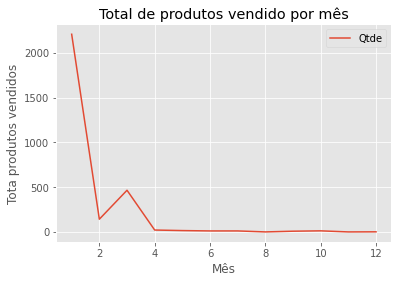

In [ ]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title='Total de produtos vendido por mês')
plt.xlabel('Mês')
plt.ylabel('Tota produtos vendidos')
plt.legend()

In [ ]:
# Criando uma agrupamento de vendas por mês
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_venda'] == 2019]
df_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1,365 days,1
...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days,1


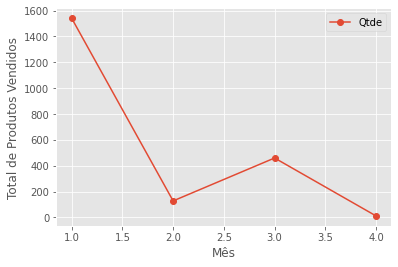

In [ ]:
# Total de produtos vendidos por mês de 2019
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend();

### Histograma

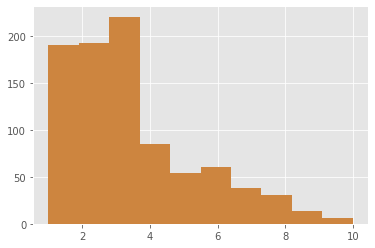

In [ ]:
# Criando um histograma
plt.hist(df['Qtde'], color="peru");

### Gráfico scatter

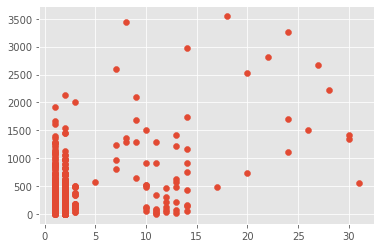

In [ ]:
plt.scatter(x = df_2019['dia_venda'], y = df_2019['Receita']);

## Salvando img de gráficos em png

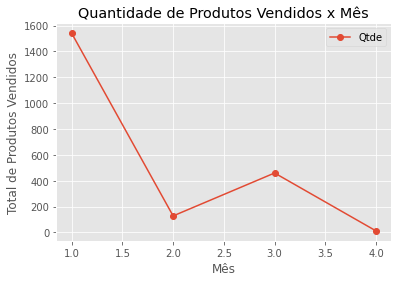

In [ ]:
# Salvando em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker= 'o')
plt.title('Quantidade de Produtos Vendidos x Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos');
plt.legend()

# Salvando imagem
plt.savefig('grafico QTDE x MES.png')